<a href="https://colab.research.google.com/github/lungnahahd/Tensorflow_Prac/blob/main/YOLO_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!curl -L "https://public.roboflow.com/ds/sHPqBiAPCq?key=CzJKnEJdfB" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   896  100   896    0     0   1902      0 --:--:-- --:--:-- --:--:--  1902
100 3791k  100 3791k    0     0  6036k      0 --:--:-- --:--:-- --:--:--  142M
Archive:  roboflow.zip
 extracting: test/images/w1240-p16x9-0e48e0098f6e832f27d8b581b33bbc72b9967a63_jpg.rf.34ed1e8f70eebdabaf43ab9d40dc1c9b.jpg  
 extracting: test/images/RTX7CCFN_jpg.rf.66ed5c5054f30d933d19ab3d56ace004.jpg  
 extracting: test/images/the-first-day-of-wuhan-s-closure-some-people-fled-some-panicked_jpg.rf.0302fefb0879eb37736a704ca5d070ff.jpg  
 extracting: test/images/1288126-10255706714jpg_jpg.rf.95f7324cbfd48e0386e0660b5e932223.jpg  
 extracting: test/images/126202-untitled-design-13_jpg.rf.56b50d413464989bb2232448a8fbb915.jpg  
 extracting: test/images/r1p00017o8171pnq407_jpg.rf.6fd25b7219a249e97f54fcabf2b52726.jpg  
 extracting: test/images/w1240-p16x9-201

In [2]:
%cd /content # 데이터 셋이 위치한 폴더로 이동/content/sample_data
!git clone https://github.com/ultralytics/yolov5.git # YOLO v5 다운로드

[Errno 2] No such file or directory: '/content # 데이터 셋이 위치한 폴더로 이동/content/sample_data'
/content
Cloning into 'yolov5'...
remote: Enumerating objects: 12310, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 12310 (delta 21), reused 35 (delta 20), pack-reused 12274
Receiving objects: 100% (12310/12310), 11.47 MiB | 25.31 MiB/s, done.
Resolving deltas: 100% (8556/8556), done.


In [3]:
%cd /content/yolov5/
!pip install -r requirements.txt # YOLOv5 를 위한 패키지 설치

/content/yolov5
     |████████████████████████████████| 596 kB 5.2 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [4]:
import yaml

with open('/content/MaskData/data.yaml','r') as f:
  data = yaml.safe_load(f)

data['train'] = '/content/MaskData/train/images'
data['val'] = '/content/MaskData/valid/images'

with open('/content/MaskData/data.yaml', 'w') as f:
  yaml.dump(data,f)


In [5]:
%cd /content/yolov5/
!python train.py --img 416 --batch 16 --epochs 50 --data /content/MaskData/data.yaml --cfg ./models/yolov5s.yaml --weights yolov5s.pt --name mask_check_models

/content/yolov5
train: weights=yolov5s.pt, cfg=./models/yolov5s.yaml, data=/content/MaskData/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=mask_check_models, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-74-gcf4f3c3 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h

In [ ]:
!python /content/yolov5/detect.py --webcam True --weights /content/yolov5/runs/train/mask_check_models/weights/best.pt --conf 0.5

usage: detect.py [-h] [--weights WEIGHTS [WEIGHTS ...]] [--source SOURCE]
                 [--data DATA] [--imgsz IMGSZ [IMGSZ ...]]
                 [--conf-thres CONF_THRES] [--iou-thres IOU_THRES]
                 [--max-det MAX_DET] [--device DEVICE] [--view-img]
                 [--save-txt] [--save-conf] [--save-crop] [--nosave]
                 [--classes CLASSES [CLASSES ...]] [--agnostic-nms]
                 [--augment] [--visualize] [--update] [--project PROJECT]
                 [--name NAME] [--exist-ok] [--line-thickness LINE_THICKNESS]
                 [--hide-labels] [--hide-conf] [--half] [--dnn]
detect.py: error: unrecognized arguments: --webcam True


In [ ]:
!python /content/yolov5/detect.py --source /content/Test.mp4 --weights /content/yolov5/runs/train/mask_check_models/weights/best.pt --conf 0.5

detect: weights=['/content/yolov5/runs/train/mask_check_models/weights/best.pt'], source=/content/Test.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-73-gd51f9b2 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
video 1/1 (1/772) /content/Test.mp4: 384x640 4 masks, Done. (0.028s)
video 1/1 (2/772) /content/Test.mp4: 384x640 4 masks, Done. (0.027s)
video 1/1 (3/772) /content/Test.mp4: 384x640 4 masks, Done. (0.027s)
video 1/1 (4/772) /content/Test.mp4: 384x640 4 masks, Done. (0.027s)
video 1/1 (5/772) /content/Test.mp4: 384x640 4 masks, Done. (0.027s)


In [ ]:
pip install opencv-python

In [ ]:
import cv2

In [ ]:
pip install matplotlib

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
  async function takePhoto(quality) {
  const div = document.createElement('div');
  const capture = document.createElement('button');
  capture.textContent = 'Capture';
  div.appendChild(capture);
  const video = document.createElement('video');
  video.style.display = 'block';
  const stream = await navigator.mediaDevices.getUserMedia({video: true});
  document.body.appendChild(div);
  div.appendChild(video); 
  video.srcObject = stream; 
  await video.play();
  // Resize the output to fit the video element.
  google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);
  // Wait for Capture to be clicked.
  await new Promise((resolve) => capture.onclick = resolve);
  const canvas = document.createElement('canvas');
  canvas.width = video.videoWidth;
  canvas.height = video.videoHeight;
  canvas.getContext('2d').drawImage(video, 0, 0);
  stream.getVideoTracks()[0].stop();
  div.remove();
  return canvas.toDataURL('image/jpeg', quality);
  }
  ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
    return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


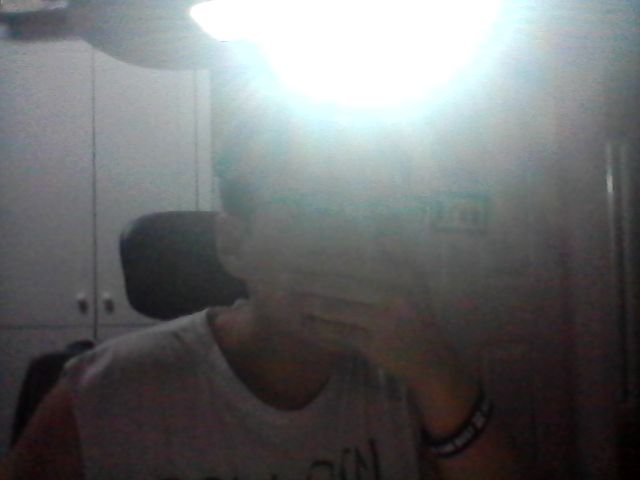

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename)) 
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
pip install cvlib

     |████████████████████████████████| 13.1 MB 5.1 MB/s 
  Created wheel for cvlib: filename=cvlib-0.2.7-py3-none-any.whl size=10046385 sha256=dd0a288d501938c8af511a0e65176fa38a4b4ac30b31b1e7561bc22da20ec6bc
  Stored in directory: /root/.cache/pip/wheels/8e/d7/31/bc643bd3a8b11a7368b1ab1d8a6299b33b462ed0b0683ddc5a
  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12082 sha256=b32fdc0d32768c67ad9f8d220084e6411ef5c22c1142e87f1cd3940e0be226b7
  Stored in directory: /root/.cache/pip/wheels/f0/fd/1f/3e35ed57e94cd8ced38dd46771f1f0f94f65fec548659ed855
Successfully built cvlib progressbar


In [ ]:
model = '/content/best.pt'
torch.save('/content',model)

In [ ]:
pip install opencv-python

In [ ]:
import torch
import cvlib as cv
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array
from PIL import ImageFont, ImageDraw, Image

model = torch.load('/content/best.pt')

from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename)) 
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

webcam = take_photo

if not webcam.isOpened():
  print("안돼 웹캠!!")
  exit()


while webcam.isOpened():
  status, frame = webcam.read()

  if not status:
    print("프레임을 읽지 못했습니다.")
    exit()
  face,confidence = cv.detect_face(frame)
  for idx, f in enumerate(face):
    (startX, startY) = f[0],f[1]
    (endX, endY) = f[2],f[3]  

    if 0 <= startX <= frame.shape[1] and 0 <= endX <= frame.shape[1] and 0 <= startY <= frame.shape[0] and 0 <= endY <= frame.shape[0]:
      face_region = frame[startY:endY, startX:endX]
      face_region1 = cv2.resize(face_region,(224,224), interpolation= cv2.INTER_AREA)
      x = img_to_array(face_region1)
      x = np.expand_dims(x, axis=0)
      x = preprocess_input(x)

      prediction = model.predict(x)

      if prediction < 0.5:
        cv2.rectangle(frame,(startX,startY),(endX,endY), (0,0,225), 2)
        Y = startY - 10 if startY -10 > 10 else startY + 10
        text = "No Mask ({:.2f}%)".format((1 - prediction[0][0])*100)
        cv2.putText(frame, text, (startX,Y), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
      else:
        cv2.rectangle(frame, (startX,startY), (endX,endY), (0,255,0), 2)
        Y = startY - 10 if startY - 10 > 10 else startY + 10
        text = "Mask ({:.2f}%)".format(prediction[0][0]*100)
        cv2.putText(frame, text, (startX,Y), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,0), 2)

    cv2.imshow("mask nomask classify", frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
      break
  
  webcam.release()
  cv2.destroyAllwindows()


<IPython.core.display.Javascript object>

AttributeError: ignored